In [25]:
import pandas as pd
import numpy as np
import datetime
import os
import re
import matplotlib.pyplot as plt

In [44]:
dir = "./../data/mock study/"
files = os.listdir(dir)
files_needed = []

In [45]:
for file in files:
    if 'sensor' in file:
        files_needed.append(file)
files_needed = sorted(files_needed)

In [62]:
# read all files and add them to one dataframe
data_list = []
for file in files_needed:
    data = pd.read_json("./../data/mock study/"+file)
    data_list.append(data)
data = pd.concat(data_list)

In [63]:
# read time 
# participant data
pData = pd.read_csv("./../data/mock study/participant.txt")

In [64]:
# Given the input data, select certain period of data using start time and end time
def selectPeriod(start, end, input):
    start = pd.to_datetime(start, format="%d/%m/%Y %H:%M:%S%z")
    end = pd.to_datetime(end, format="%d/%m/%Y %H:%M:%S%z")
    return input[(input['timestamp'] > start) & (input['timestamp'] <= end)].copy()

In [65]:
# create patient data by cropping time
data_list = []
for i in range(pData.shape[0]):
    startTime = pData.iloc[i, 0]
    endTime = pData.iloc[i, 1]
    newData = selectPeriod(startTime, endTime, data)
    newData['ActivityNumber'] = pData.iloc[i, 2]
    data_list.append(newData)
# selected participant data
patData = pd.concat(data_list)

In [ ]:
patData.to_csv

In [66]:
def draw_plot(activity):
    x = patData.query("ActivityNumber == %d"%activity)['accelX']
    y = patData.query("ActivityNumber == %d"%activity)['accelY']
    z = patData.query("ActivityNumber == %d"%activity)['accelZ']
    
    index = [i for i in range(len(x))]
    
    plt.plot(index, x, 'r-', label='X')
    plt.plot(index, y, 'b-', label='Y')
    plt.plot(index, z, 'g-', label='Z')

    plt.title('Accelerometer data for Activity #%d'%activity)
    plt.xlabel('index')
    plt.ylabel('Accel')
    
    plt.legend()
    plt.show()

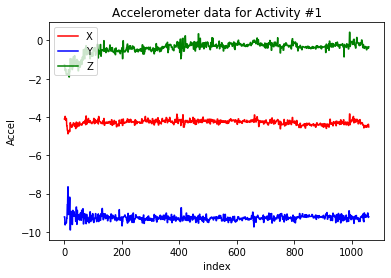

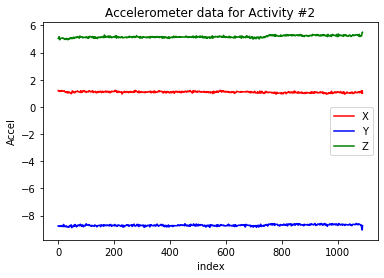

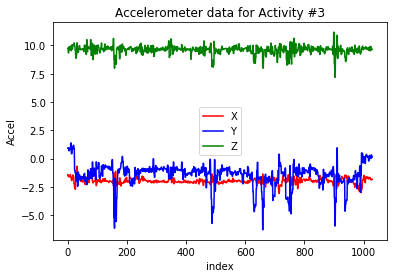

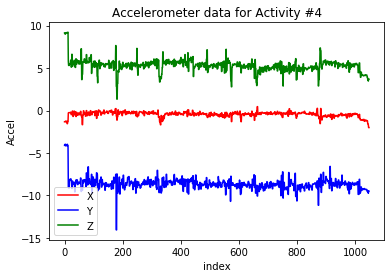

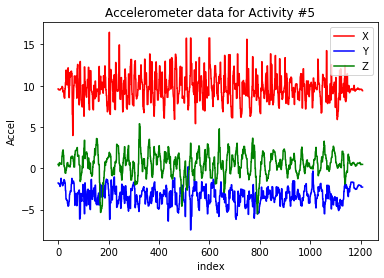

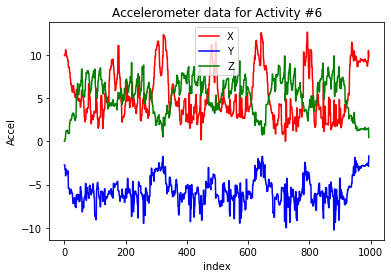

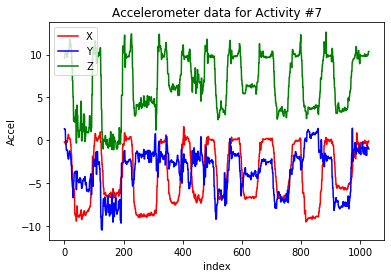

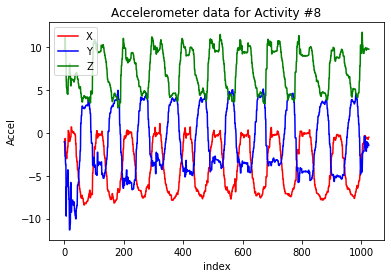

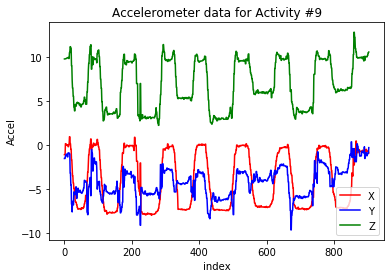

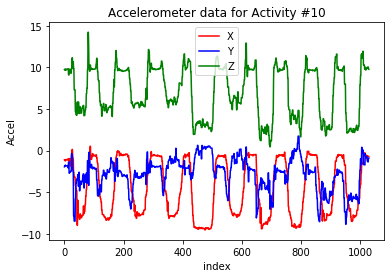

In [67]:
for i in range(1, 11):
    draw_plot(i)